In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('【ローデータ・GT表】2403運転免許保有者に関する調査.xlsx', sheet_name='基準クリア年齢性別順')
df.columns


Index(['no', 'group1', 'group2', 'sc1', 'sc2_1', 'sc3', 'sc4', 'sc5-1',
       'sc5-2', 'sc5-3',
       ...
       'aq-1', 'aq-2', 'bq-1', 'bq-2', 'cq-1', 'cq-2', 'dq-1', 'dq-2', 'eq-1',
       'eq-2'],
      dtype='object', length=258)

In [24]:
#q12_1~q12_18を指定

df_dsq = df.loc[:, 'q12_1':'q12_18']
df_dsq

,q12_1,q12_2,q12_3,q12_4,q12_5,q12_6,q12_7,q12_8,q12_9,q12_10,q12_11,q12_12,q12_13,q12_14,q12_15,q12_16,q12_17,q12_18
0,4,1,3,2,3,2,2,3,3,1,4,1,3,3,2,2,4,2
1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,1,3,3,4,3,2,3,3,4,3,3,2,3,4,3,3,3,2
3,3,2,3,4,1,2,1,2,4,3,3,1,3,2,2,1,3,2
4,3,4,4,4,1,1,1,4,4,1,4,4,4,4,1,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2,3,3,3,2,3,2,4,3,2,4,1,3,1,1,1,4,3
800,2,1,2,3,2,2,1,1,4,3,3,2,3,2,2,1,1,1
801,2,2,3,3,2,3,3,3,3,3,2,2,2,2,2,2,2,3
802,2,1,4,4,2,2,2,1,4,4,3,1,3,2,2,1,1,2


In [25]:
#1,3,6を逆転
df_dsq[df_dsq.columns[0]] = 5 - df_dsq[df_dsq.columns[0]]
df_dsq[df_dsq.columns[2]] = 5 - df_dsq[df_dsq.columns[2]]
df_dsq[df_dsq.columns[5]] = 5 - df_dsq[df_dsq.columns[5]]
df_dsq



,q12_1,q12_2,q12_3,q12_4,q12_5,q12_6,q12_7,q12_8,q12_9,q12_10,q12_11,q12_12,q12_13,q12_14,q12_15,q12_16,q12_17,q12_18
0,1,1,2,2,3,3,2,3,3,1,4,1,3,3,2,2,4,2
1,1,4,1,4,4,1,4,4,4,4,4,4,4,4,4,4,4,4
2,4,3,2,4,3,3,3,3,4,3,3,2,3,4,3,3,3,2
3,2,2,2,4,1,3,1,2,4,3,3,1,3,2,2,1,3,2
4,2,4,1,4,1,4,1,4,4,1,4,4,4,4,1,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,3,3,2,3,2,2,2,4,3,2,4,1,3,1,1,1,4,3
800,3,1,3,3,2,3,1,1,4,3,3,2,3,2,2,1,1,1
801,3,2,2,3,2,2,3,3,3,3,2,2,2,2,2,2,2,3
802,3,1,1,4,2,3,2,1,4,4,3,1,3,2,2,1,1,2


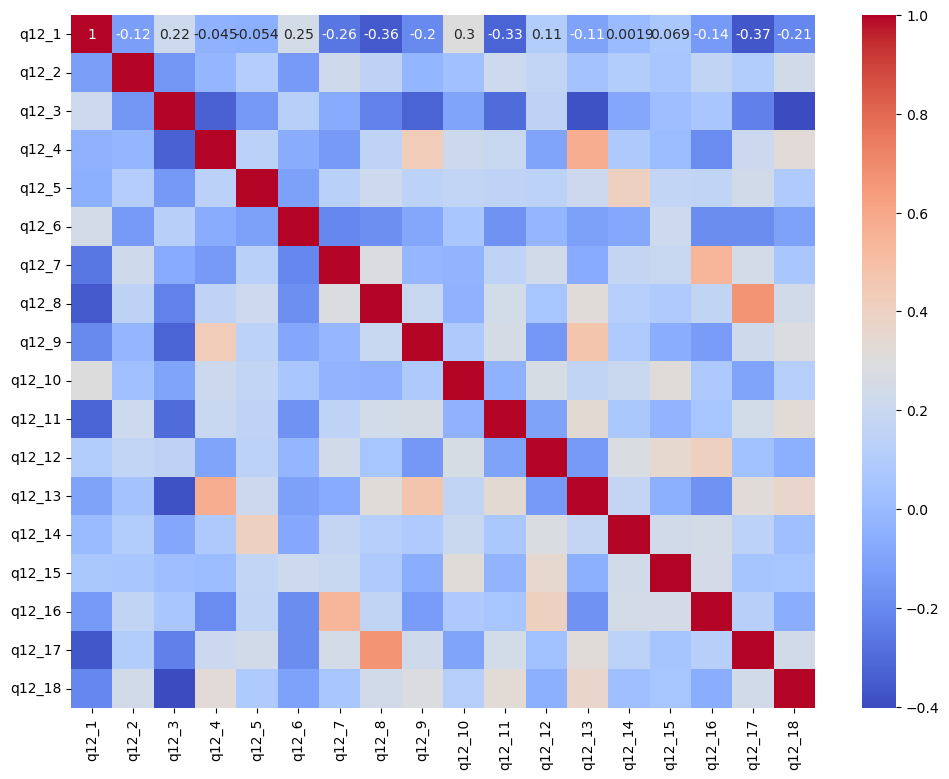

In [26]:
#seabornで相関係数を算出
#図を大きくする
plt.figure(figsize=(12, 9))

#ヒートマップの色を変える
sns.heatmap(df_dsq.corr(), annot=True, cmap='coolwarm')
# sns.heatmap(df_dsq.corr(), annot=True)
plt.show()

In [4]:
# sns.pairplot(df_dsq)

各次元の寄与率: [0.21453535 0.12431262 0.11434756 0.07427819 0.06700243 0.051947
 0.04929732 0.03845006 0.03750247 0.03481031 0.03191576 0.03032654
 0.02768251 0.02634911 0.02335748 0.02030295 0.01697403 0.01660832]
累積寄与率: 1.0


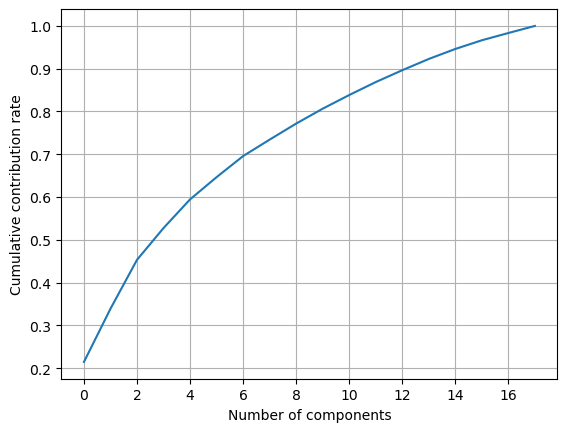

In [27]:
#主成分分析
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_dsq)

# データを主成分空間に写像
feature = pca.transform(df_dsq)

# 寄与率
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

#最適な主成分数を決定
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative contribution rate')
plt.grid()
plt.show()

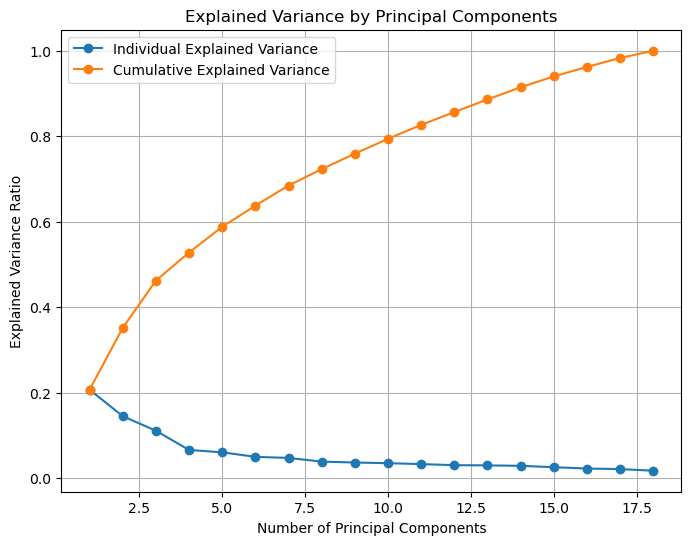

寄与率: [0.20672567 0.14466219 0.11070241 0.0656691  0.06012289 0.04955448
 0.04701127 0.03837724 0.03628589 0.03472783 0.032581   0.03002441
 0.02956576 0.02852212 0.0253116  0.02221559 0.02086954 0.01707102]
累積寄与率: [0.20672567 0.35138786 0.46209027 0.52775937 0.58788226 0.63743674
 0.68444801 0.72282524 0.75911113 0.79383896 0.82641996 0.85644438
 0.88601014 0.91453226 0.93984386 0.96205944 0.98292898 1.        ]
累積寄与率が80.0%を超える最小の主成分数: 11
最適な主成分に基づく変換後のデータの形状: (804, 11)


In [28]:
# データの標準化（PCAはスケールに敏感なため、標準化が推奨されます）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dsq)

# PCAの適用
pca = PCA()
pca.fit(data_scaled)

# 寄与率と累積寄与率の計算
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 寄与率と累積寄与率のプロット
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

# 累積寄与率が90%以上になる最小の主成分数を計算
threshold = 0.80
optimal_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

print(f'寄与率: {explained_variance_ratio}')
print(f'累積寄与率: {cumulative_variance_ratio}')
print(f'累積寄与率が{threshold * 100}%を超える最小の主成分数: {optimal_components}')

# 最適な主成分数を使ってPCAを再実行
pca_optimal = PCA(n_components=optimal_components)
data_pca = pca_optimal.fit_transform(data_scaled)

print(f'最適な主成分に基づく変換後のデータの形状: {data_pca.shape}')

In [12]:
# !pip install factor-analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ------------------------------------ - 41.0/42.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 693.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=7db2fd37219e13ee846ed75c8c70e73df7496e105400b194536384643acb210c
  Stored in directory: c:\users\shun0\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


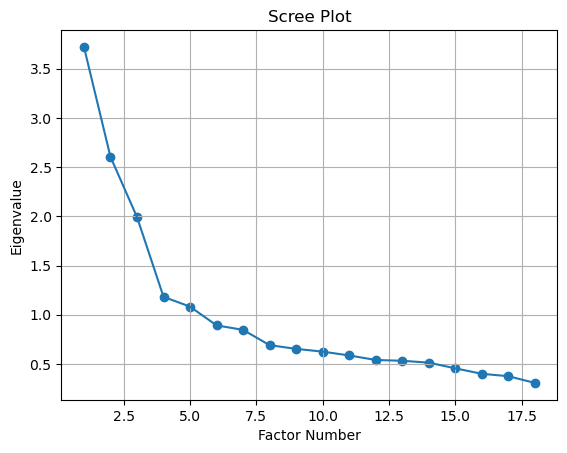

固有値: [3.72106213 2.60391939 1.99264342 1.18204374 1.08221205 0.89198059
 0.84620279 0.69079025 0.65314599 0.62510098 0.58645799 0.54043946
 0.53218373 0.51339811 0.45560883 0.39988055 0.37565166 0.30727834]
最適な因子数: 5
因子負荷量:
               0         1         2         3         4
q12_1  -0.092961 -0.292860 -0.305014  0.241857  0.129887
q12_2   0.135897 -0.084513  0.461002  0.079303 -0.040236
q12_3  -0.576198  0.008598 -0.171972 -0.016451  0.043270
q12_4   0.658232  0.034065 -0.237688  0.065412  0.155560
q12_5   0.142162  0.088268  0.021132  0.022886  0.464749
q12_6  -0.060953  0.071576 -0.257794  0.395030 -0.223793
q12_7  -0.171448  0.134215  0.578898  0.024245  0.122354
q12_8   0.104375  0.776233  0.007381  0.141282  0.030609
q12_9   0.540304  0.060999 -0.112929 -0.087289  0.124018
q12_10  0.289865 -0.201313 -0.000863  0.447735  0.257910
q12_11  0.410241 -0.001918  0.311313 -0.123177 -0.024656
q12_12 -0.210851  0.007518  0.269777  0.357873  0.285663
q12_13  0.705744  0.117303 -0.22147

In [29]:
from factor_analyzer import FactorAnalyzer
# データの共分散行列の固有値を計算
fa = FactorAnalyzer(rotation='promax')
fa.fit(df_dsq)
ev, v = fa.get_eigenvalues()

#同じ大きさのランダムなデータを作成
np.random.seed(0)
df_random = pd.DataFrame(np.random.randn(100, 18), columns=[f'random_{i}' for i in range(1, 19)])

# データの共分散行列の固有値を計算
fa_random = FactorAnalyzer(rotation='promax')
fa_random.fit(df_random)
ev_random, v_random = fa_random.get_eigenvalues()

# 固有値のプロット（スクリープロット）
plt.scatter(range(1, df_dsq.shape[1] + 1), ev)
plt.plot(range(1, df_dsq.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# 最適な因子数の検証
# 通常、固有値が1以上のものが因子として選ばれる
print(f'固有値: {ev}')

# 最適な因子数（例: 固有値が1以上の数）
optimal_factors = np.sum(ev > 1)
print(f'最適な因子数: {optimal_factors}')

# 因子分析の実行（最適な因子数を使用）
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(df_dsq)

# 因子負荷量を表示
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=df_dsq.columns)
print(f'因子負荷量:\n{factor_loadings}')

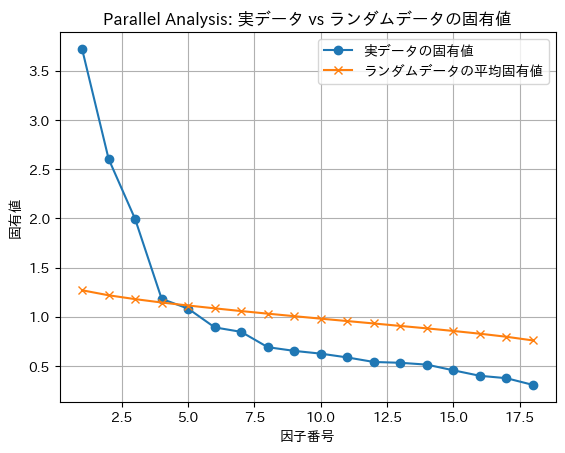

平行分析による最適な因子数: 4
因子負荷量（プロマックス回転後）:
               0         1         2         3         4
q12_1  -0.092961 -0.292860 -0.305014  0.241857  0.129887
q12_2   0.135897 -0.084513  0.461002  0.079303 -0.040236
q12_3  -0.576198  0.008598 -0.171972 -0.016451  0.043270
q12_4   0.658232  0.034065 -0.237688  0.065412  0.155560
q12_5   0.142162  0.088268  0.021132  0.022886  0.464749
q12_6  -0.060953  0.071576 -0.257794  0.395030 -0.223793
q12_7  -0.171448  0.134215  0.578898  0.024245  0.122354
q12_8   0.104375  0.776233  0.007381  0.141282  0.030609
q12_9   0.540304  0.060999 -0.112929 -0.087289  0.124018
q12_10  0.289865 -0.201313 -0.000863  0.447735  0.257910
q12_11  0.410241 -0.001918  0.311313 -0.123177 -0.024656
q12_12 -0.210851  0.007518  0.269777  0.357873  0.285663
q12_13  0.705744  0.117303 -0.221475 -0.041851  0.247945
q12_14  0.060671 -0.023118  0.072305  0.052057  0.580422
q12_15 -0.018062  0.179902  0.157790  0.670477  0.048252
q12_16 -0.311254  0.008999  0.562986  0.058845  0.296

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from factor_analyzer import FactorAnalyzer

# 平行分析のためのランダムデータを作成する関数
def parallel_analysis(df, n_iter=1000):
    np.random.seed(0)
    random_eigenvalues = []
    
    for _ in range(n_iter):
        # ランダムデータの生成
        df_random = pd.DataFrame(np.random.randn(*df.shape))
        # ランダムデータに対して因子分析（最小残差法を使用）
        fa_random = FactorAnalyzer(method='minres', rotation=None)
        fa_random.fit(df_random)
        ev_random, _ = fa_random.get_eigenvalues()  # 固有値の取得
        random_eigenvalues.append(ev_random)
    
    # 平行分析のためのランダムデータの平均固有値
    mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)
    return mean_random_eigenvalues

# 実際のデータの因子分析（プロマックス回転なしで固有値の取得）
fa = FactorAnalyzer(method='minres', rotation=None)
fa.fit(df_dsq)  # 実際のデータフレーム（df_dsq）を使用
ev, v = fa.get_eigenvalues()

# 平行分析（ランダムデータ）の実行
mean_random_eigenvalues = parallel_analysis(df_dsq)

# 実データとランダムデータの固有値を比較するグラフの描画
plt.plot(range(1, len(ev) + 1), ev, marker='o', label='実データの固有値')
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='x', label='ランダムデータの平均固有値')
plt.title('Parallel Analysis: 実データ vs ランダムデータの固有値')
plt.xlabel('因子番号')
plt.ylabel('固有値')
plt.legend()
plt.grid()
plt.show()

# 実データの固有値がランダムデータの固有値を上回る部分で因子数を決定
optimal_factors = np.sum(ev > mean_random_eigenvalues)
print(f'平行分析による最適な因子数: {optimal_factors}')

optimal_factors = 5
# 因子分析の実行（最小残差法＋プロマックス回転を使用）
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, method='minres', rotation='promax')
fa_optimal.fit(df_dsq)

# 因子負荷量を表示
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=df_dsq.columns)
print(f'因子負荷量（プロマックス回転後）:\n{factor_loadings}')


因子得点:
          因子1       因子2       因子3       因子4       因子5
0   -0.087806  1.393925  0.720176 -0.845694  0.155868
1    1.377544  1.604679  3.404771  1.501603  2.931149
2    0.121955  0.270068  0.932776  1.255871  1.876631
3    0.592074 -0.120900 -0.670272  0.121332 -0.502233
4    1.532412  1.252687  0.682029  0.075759  0.247406
..        ...       ...       ...       ...       ...
799  0.624552  1.249998  0.425286 -0.713349 -0.864811
800 -0.328086 -1.624722 -1.136303  0.568705  0.050946
801 -0.370766 -0.236153  0.862376  0.679394 -0.013652
802  0.669350 -1.654216 -0.640425  0.662562 -0.117786
803 -0.741600 -0.467238  0.026621 -0.278912 -1.156663

[804 rows x 5 columns]


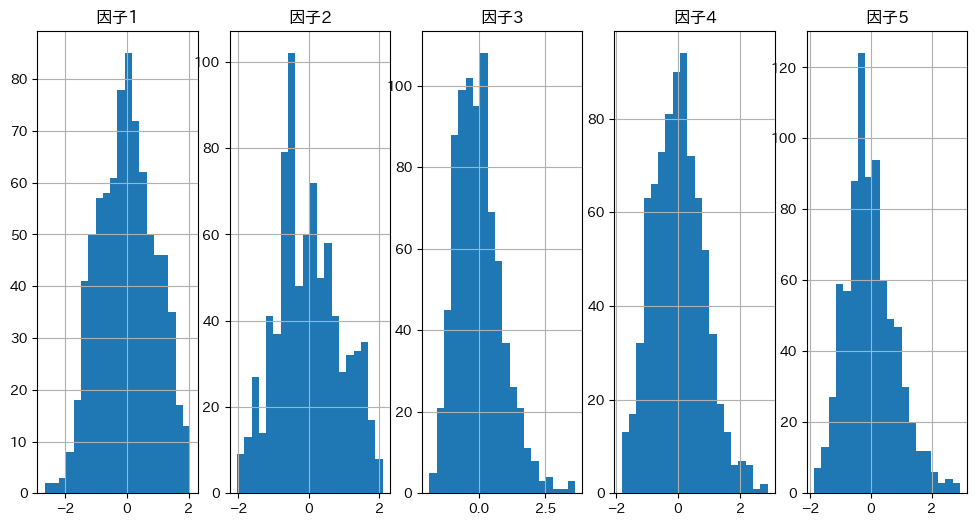

In [40]:
# 因子得点を計算
factor_scores = fa_optimal.transform(df_dsq)
factor_scores = pd.DataFrame(factor_scores, columns=[f'因子{i + 1}' for i in range(optimal_factors)])
print(f'因子得点:\n{factor_scores}')

# 因子得点の可視化
plt.figure(figsize=(12, 6))
for i in range(optimal_factors):
    plt.subplot(1, optimal_factors, i + 1)
    plt.hist(factor_scores[f'因子{i + 1}'], bins=20)
    plt.title(f'因子{i + 1}')
    plt.grid()

In [39]:
allsum = pd.read_csv('all_sum.csv')
allsum

,Unnamed: 0,x,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,9.6667,18.9333,22.2000,22.0000,21.0000
1,1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,...,14,8,12,21,3,18.0000,18.0000,18.0000,18.0000,18.0000
2,2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,14.8000,14.8000,16.4000,15.7333,20.5333
3,3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,13.6667,20.2667,23.4000,19.7333,22.7333
4,4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,8.6667,26.4667,27.4667,25.0667,28.1333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,...,33,19,18,11,4,12.0000,25.8000,27.0000,27.0000,27.0000
800,800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,14.8000,24.3333,25.6667,22.6667,24.2000
801,801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,...,14,16,11,21,2,20.2667,19.4000,21.2000,21.2000,21.2000
802,802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,11.0667,27.6667,25.4667,24.1333,26.0000


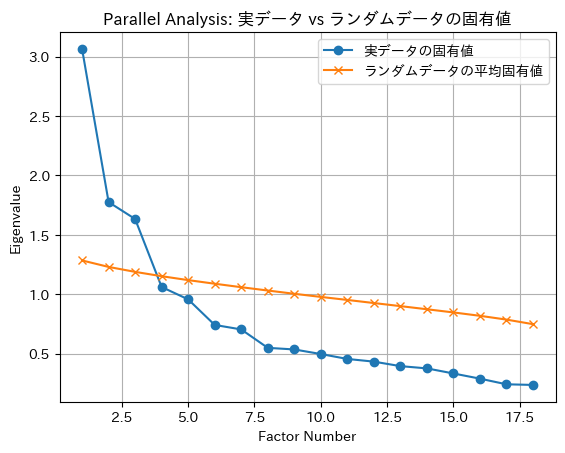

平行分析による最適な因子数: 3
因子負荷量（回転なし）:
               0         1         2
q12_1   0.415048 -0.224252  0.501578
q12_2  -0.183282  0.262781  0.000900
q12_3   0.474228  0.095991 -0.003319
q12_4  -0.479665 -0.289621  0.212749
q12_5  -0.287091  0.188316  0.203043
q12_6   0.255025 -0.178539  0.184701
q12_7  -0.144820  0.510608 -0.083486
q12_8  -0.545821  0.279928 -0.178651
q12_9  -0.502773 -0.210750  0.039941
q12_10 -0.090254  0.020633  0.589825
q12_11 -0.431947  0.037038 -0.128096
q12_12  0.053103  0.381568  0.293408
q12_13 -0.578548 -0.232954  0.136461
q12_14 -0.205472  0.264499  0.302522
q12_15 -0.022477  0.299283  0.351717
q12_16 -0.016635  0.555406  0.060147
q12_17 -0.562035  0.236295 -0.200414
q12_18 -0.449621 -0.062642  0.023687


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.decomposition import FactorAnalysis, PCA

# 平行分析のためのランダムデータを作成する関数
def parallel_analysis(df, n_iter=1000):
    np.random.seed(0)
    random_eigenvalues = []
    
    for _ in range(n_iter):
        df_random = pd.DataFrame(np.random.randn(*df.shape))
        pca_random = PCA()
        pca_random.fit(df_random)
        random_eigenvalues.append(pca_random.explained_variance_)
    
    # 平行分析のためのランダムデータの平均固有値
    mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)
    return mean_random_eigenvalues

# 実際のデータの主成分分析
pca = PCA()
pca.fit(df_dsq)
ev = pca.explained_variance_

# 平行分析（ランダムデータ）の実行
mean_random_eigenvalues = parallel_analysis(df_dsq)

# 実データとランダムデータの固有値を比較
plt.plot(range(1, len(ev) + 1), ev, marker='o', label='実データの固有値')
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='x', label='ランダムデータの平均固有値')
plt.title('Parallel Analysis: 実データ vs ランダムデータの固有値')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid()
plt.show()

# 実データの固有値がランダムデータの固有値を上回る部分で因子数を決定
optimal_factors = np.sum(ev > mean_random_eigenvalues)
print(f'平行分析による最適な因子数: {optimal_factors}')

# 因子分析の実行（最小残差法と同等のものとして FactorAnalysis を使用）
fa_optimal = FactorAnalysis(n_components=optimal_factors)
fa_optimal.fit(df_dsq)

# 因子負荷量を表示
factor_loadings = pd.DataFrame(fa_optimal.components_.T, index=df_dsq.columns)
print(f'因子負荷量（回転なし）:\n{factor_loadings}')
